<a href="https://colab.research.google.com/github/developerabhi14/ML-Notebooks/blob/main/Locally_weighted_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import matplotlib.pyplot as plt


In [72]:
sigma=0.2

X=np.array(np.random.normal(10,5,100))

X=np.sort(X)

func=np.cos((X*np.pi/3.5))

y=np.array(func+np.random.normal(0, sigma, 100))
y

array([ 0.53321036,  0.29379944, -0.76524658, -1.03526684, -0.83890293,
       -0.57759293, -1.24875073, -0.94029682, -0.77325786, -1.41727392,
       -0.90647324, -0.33102043, -0.48819796, -0.0962167 ,  0.30921548,
        0.44086777,  0.45445962,  1.10626984,  0.6832412 ,  1.21663755,
        0.94575041,  0.90039017,  1.19296633,  0.73369864,  1.05595636,
        0.76498688,  0.99945326,  0.65692142,  0.68918573,  0.57226696,
        0.93142079,  0.69807991,  0.13533548, -0.16986983,  0.24032249,
       -0.1527646 , -0.51373629, -0.59466587, -0.84289855, -0.95303164,
       -0.26891971, -0.66598866, -0.99758746, -0.6356479 , -0.88755407,
       -1.34778557, -1.02836556, -0.8759416 , -1.03601036, -1.04525952,
       -0.84119987, -0.79047204, -1.22605564, -1.03974012, -0.92095283,
       -1.19932927, -0.96342997, -0.34127908, -0.3727609 , -0.36202645,
       -0.55326245,  0.43009445,  0.60645641,  0.16544307, -0.05707804,
        0.23951122,  0.42218634,  0.52662068,  1.12313769,  0.97

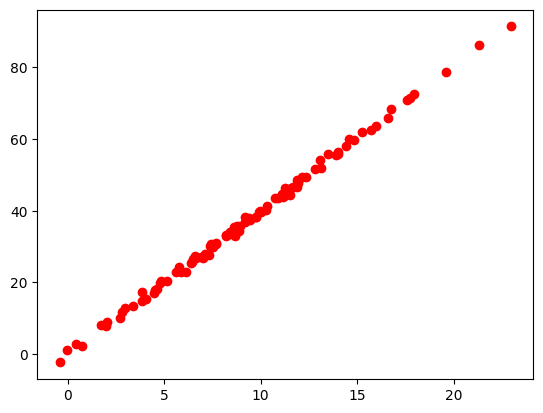

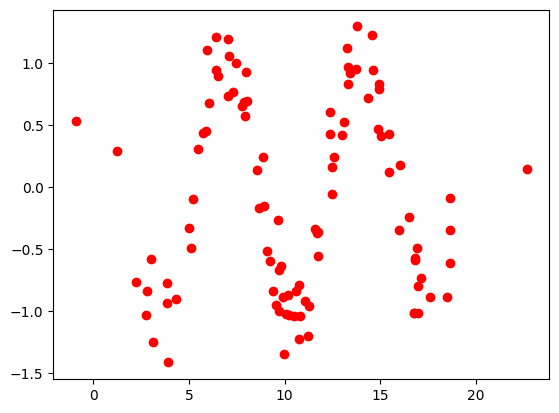

In [73]:
plt.plot(X,y,'ro')

In [74]:
X_mat=np.matrix(X).T
m=X_mat.shape[0]

In [75]:
X_con=np.concatenate([np.ones([m,1]),X_mat],1)
print(X_con)

[[ 1.         -0.8972202 ]
 [ 1.          1.271119  ]
 [ 1.          2.25046257]
 [ 1.          2.77180521]
 [ 1.          2.83112088]
 [ 1.          3.01490187]
 [ 1.          3.13569708]
 [ 1.          3.86501573]
 [ 1.          3.87688942]
 [ 1.          3.91797776]
 [ 1.          4.35525031]
 [ 1.          5.02410773]
 [ 1.          5.13479597]
 [ 1.          5.20524564]
 [ 1.          5.49901972]
 [ 1.          5.76457385]
 [ 1.          5.89778638]
 [ 1.          5.95720426]
 [ 1.          6.04009379]
 [ 1.          6.39819368]
 [ 1.          6.4320891 ]
 [ 1.          6.52003349]
 [ 1.          7.05423141]
 [ 1.          7.0554923 ]
 [ 1.          7.12280759]
 [ 1.          7.31928749]
 [ 1.          7.46102986]
 [ 1.          7.75833068]
 [ 1.          7.88081655]
 [ 1.          7.93470052]
 [ 1.          7.96439829]
 [ 1.          8.05988619]
 [ 1.          8.55011044]
 [ 1.          8.64339496]
 [ 1.          8.85035005]
 [ 1.          8.93850201]
 [ 1.          9.09086316]
 

In [80]:
def lwr(X, y, tau):
  y_pred=np.zeros(m)
  for i in range(m):
    y_pred[i]=X[i]*localweight(X[i], X, y, tau)
  return y_pred


def localweight(xi,X,y,tau):
  wt=funct(xi, X, tau)
  w=np.linalg.inv(X.T*(wt*X))*((X.T*wt)*y.T)
  return w

def funct(xi, X, tau):
  weights=np.mat(np.eye(m))
  for i in range(m):
    diff=xi-X[i]
    weights[i,i]=np.exp(diff*diff.T/(-2.0*tau**2))
  return weights


In [85]:
y_mat=np.matrix(y)
print(y_mat)
tau=0.5
y_predicted=lwr(X_con, y_mat, tau)


[[ 0.53321036  0.29379944 -0.76524658 -1.03526684 -0.83890293 -0.57759293
  -1.24875073 -0.94029682 -0.77325786 -1.41727392 -0.90647324 -0.33102043
  -0.48819796 -0.0962167   0.30921548  0.44086777  0.45445962  1.10626984
   0.6832412   1.21663755  0.94575041  0.90039017  1.19296633  0.73369864
   1.05595636  0.76498688  0.99945326  0.65692142  0.68918573  0.57226696
   0.93142079  0.69807991  0.13533548 -0.16986983  0.24032249 -0.1527646
  -0.51373629 -0.59466587 -0.84289855 -0.95303164 -0.26891971 -0.66598866
  -0.99758746 -0.6356479  -0.88755407 -1.34778557 -1.02836556 -0.8759416
  -1.03601036 -1.04525952 -0.84119987 -0.79047204 -1.22605564 -1.03974012
  -0.92095283 -1.19932927 -0.96342997 -0.34127908 -0.3727609  -0.36202645
  -0.55326245  0.43009445  0.60645641  0.16544307 -0.05707804  0.23951122
   0.42218634  0.52662068  1.12313769  0.971524    0.83441634  0.91840162
   0.95294434  1.29813867  0.71896607  1.23070891  0.94974671  0.46937199
   0.83206843  0.79186292  0.41018006  0

<ipython-input-80-3a0aedeffe84>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[i,i]=np.exp(diff*diff.T/(-2.0*tau**2))
<ipython-input-80-3a0aedeffe84>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i]=X[i]*localweight(X[i], X, y, tau)


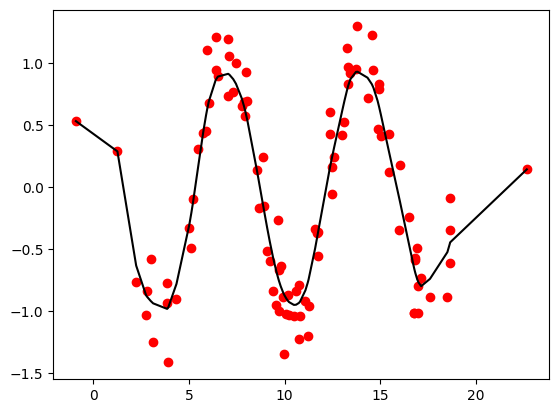

In [86]:
plt.plot(X,y,'ro')
plt.plot(X,y_predicted, 'k-')